In [15]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 3 models, 10 tasks, 5 classes, precision + recall + average.

In [32]:
OUT_PATH = "../output/"
MODEL_TYPE, PRETRAINED = ('RN50', 'yfcc15m')
N_TASKS = 10
NUM_CLASSES = 250

In [105]:
def load_result(model_type, pretrained, task_id, n_tasks, template, metric):
    out_fp = os.path.join(OUT_PATH, f"{model_type}/{pretrained}/{template}_{n_tasks}_tasks_{task_id}.json")
    with open(out_fp, 'r') as file:
        output = json.load(file)
    return np.array([output["classification_report"][str(i)][metric] for i in range(NUM_CLASSES // n_tasks)])

# def create_ax(ax, task_id, metric):
#     result_temp = load_result(MODEL_TYPE, PRETRAINED, task_id, N_TASKS, "imagenet1k", metric)
#     result_ideal = load_result(MODEL_TYPE, PRETRAINED, task_id, N_TASKS, "imagenet_captions", metric)

#     bar_width = 0.4
#     x = np.arange(len(result_temp) + 1)
#     for i in range(len(result_temp)):
#         ax.bar(x[i] - bar_width/2, result_temp[i], bar_width, color=baseline_color, alpha=0.3)
#         ax.bar(x[i] + bar_width/2, result_ideal[i], bar_width, color=my_color, alpha=0.3)
#     ax.bar(x[-1] - bar_width/2, result_temp.mean(), bar_width, color=baseline_color)
#     ax.bar(x[-1] + bar_width/2, result_ideal.mean(), bar_width, color=my_color)

def create_ax(ax, metric, colors):
    baseline_color, my_color = colors
    result_temp = []
    result_ideal = []
    for task_id in range(N_TASKS):
        result_temp.append(load_result(MODEL_TYPE, PRETRAINED, task_id, N_TASKS, "imagenet1k", metric).mean())
        result_ideal.append(load_result(MODEL_TYPE, PRETRAINED, task_id, N_TASKS, "imagenet_captions", metric).mean())

    bar_width = 0.3
    x = np.arange(len(result_temp))
    ax.bar(x - bar_width/2, result_temp, bar_width, color=baseline_color, edgecolor="k")
    ax.bar(x + bar_width/2, result_ideal, bar_width, color=my_color, edgecolor="k")

In [96]:
# sns.set_style("whitegrid")

# scale = 3
# fig, axes = plt.subplots(2, 5, figsize=(9 * scale, 2 * scale))

# metric = "precision"
# for i, task_id in enumerate(list(range(0, 5))):
#     create_ax(axes[0, i], task_id, metric)
# for i, task_id in enumerate(list(range(5, 10))):
#     create_ax(axes[1, i], task_id, metric)

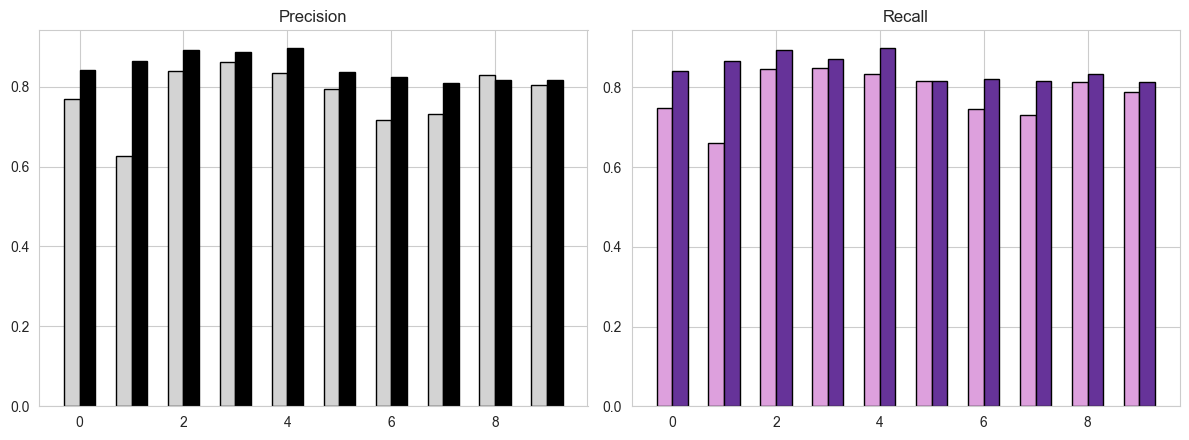

In [107]:
sns.set_style("whitegrid")

scale = 3
fig, axes = plt.subplots(1, 2, figsize=(4 * scale, 1.5 * scale))

create_ax(axes[0], "precision", colors=("lightgray", "k"))
create_ax(axes[1], "recall", colors=("plum", "rebeccapurple"))

axes[0].set_title("Precision")
axes[1].set_title("Recall")

fig.tight_layout()